# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Install Other Requirements

In [ ]:
%pip install -r requirements.txt

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
# Perform preliminary data exploration
shape = df_data.shape
columns = df_data.columns.tolist()
nan_values = df_data.isna().sum()
duplicates = df_data.duplicated().sum()

print(f"Shape: {shape}")
print(f"Columns: {columns}")
print(f"NaN values: {nan_values}")
print(f"Duplicates: {duplicates}")

Shape: (4324, 9)
Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']
NaN values: Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
Duplicates: 0


1. **Shape of `df_data`:** The dataset has 4324 rows and 9 columns.
2. **Column Names:**
   - Unnamed: 0.1
   - Unnamed: 0
   - Organisation
   - Location
   - Date
   - Detail
   - Rocket_Status
   - Price
   - Mission_Status
3. **NaN Values:**
   - Unnamed: 0.1: 0
   - Unnamed: 0: 0
   - Organisation: 0
   - Location: 0
   - Date: 0
   - Detail: 0
   - Rocket_Status: 0
   - Price: 3360
   - Mission_Status: 0
4. **Duplicates:** There are no duplicate rows in the dataset.

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [5]:
# Remove columns containing junk data
df_cleaned = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df_cleaned

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
# Handle missing values in the 'Price' column
# Since 'Price' has a large number of missing values, we can either fill them with a placeholder or drop the column if it's not critical
df_cleaned['Price'] = df_cleaned['Price'].fillna('Unknown')

In [7]:
# Check for any remaining duplicates and remove them if necessary
df_cleaned = df_cleaned.drop_duplicates()

In [8]:
# Display the cleaned dataframe's shape and columns
cleaned_shape = df_cleaned.shape
cleaned_columns = df_cleaned.columns.tolist()

cleaned_shape, cleaned_columns, df_cleaned.head()

((4323, 7),
 ['Organisation',
  'Location',
  'Date',
  'Detail',
  'Rocket_Status',
  'Price',
  'Mission_Status'],
   Organisation                                           Location  \
 0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
 1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
 2       SpaceX                      Pad A, Boca Chica, Texas, USA   
 3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
 4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
 
                          Date                                        Detail  \
 0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
 1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
 2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
 3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
 4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541

In [9]:
df_cleaned

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Unknown,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Unknown,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Unknown,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Unknown,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,Unknown,Success


## Descriptive Statistics

In [10]:
# Generate descriptive statistics for the cleaned dataset
descriptive_stats = df_cleaned.describe(include='all')

In [11]:
descriptive_stats

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,4323,4323
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,Unknown,Success
freq,1777,235,2,6,3534,3360,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [12]:
# Calculate the number of launches per organisation
launches_per_organisation = df_cleaned['Organisation'].value_counts().reset_index()
launches_per_organisation.columns = ['Organisation', 'Number of Launches']
launches_per_organisation

,Organisation,Number of Launches
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,250
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


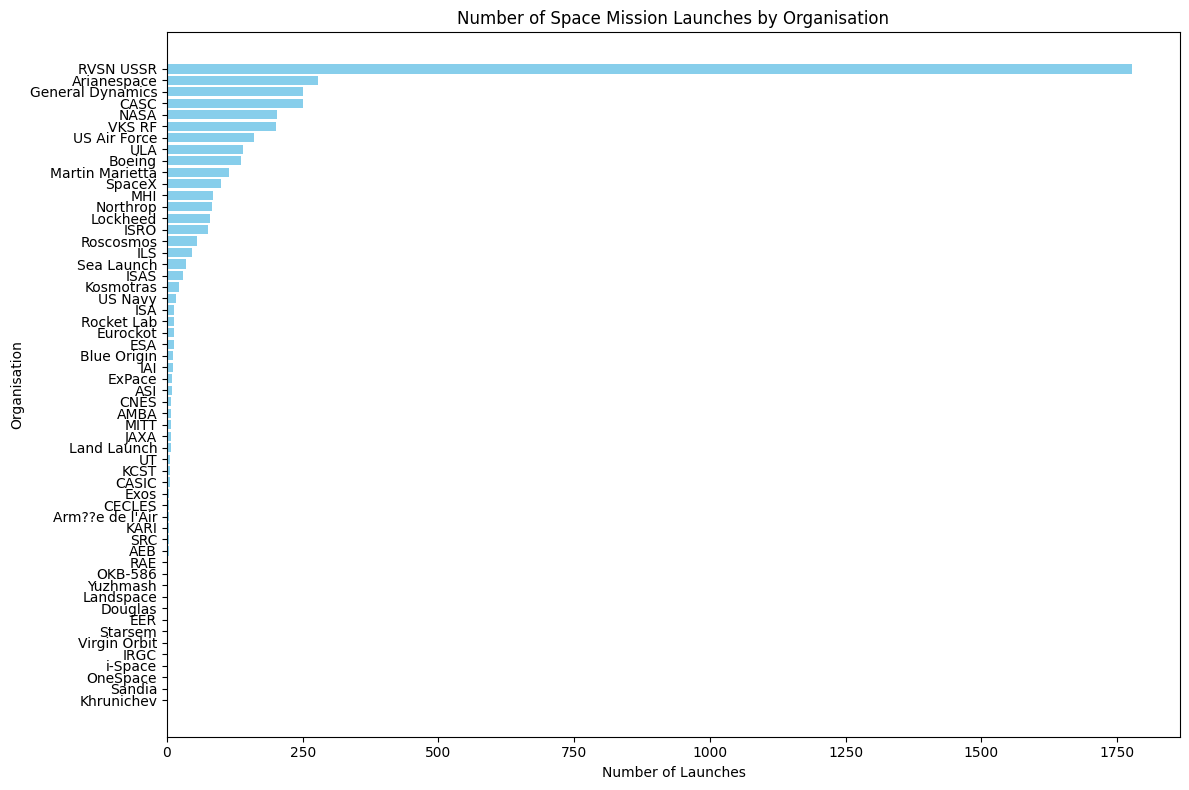

In [13]:
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    launches_per_organisation['Organisation'],
    launches_per_organisation['Number of Launches'],
    color='skyblue',
)
plt.xlabel('Number of Launches')
plt.ylabel('Organisation')
plt.title('Number of Space Mission Launches by Organisation')
plt.gca().invert_yaxis()  # Invert y-axis to show the largest values at the top
plt.tight_layout()

# Display the plot
plt.show()

The chart shows that some organizations have a significantly higher number of launches compared to others. This visualization helps in identifying the leading organizations in terms of space mission launches.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
# Calculate the number of active versus retired rockets
rocket_status_counts = df_cleaned['Rocket_Status'].value_counts()
rocket_status_counts

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

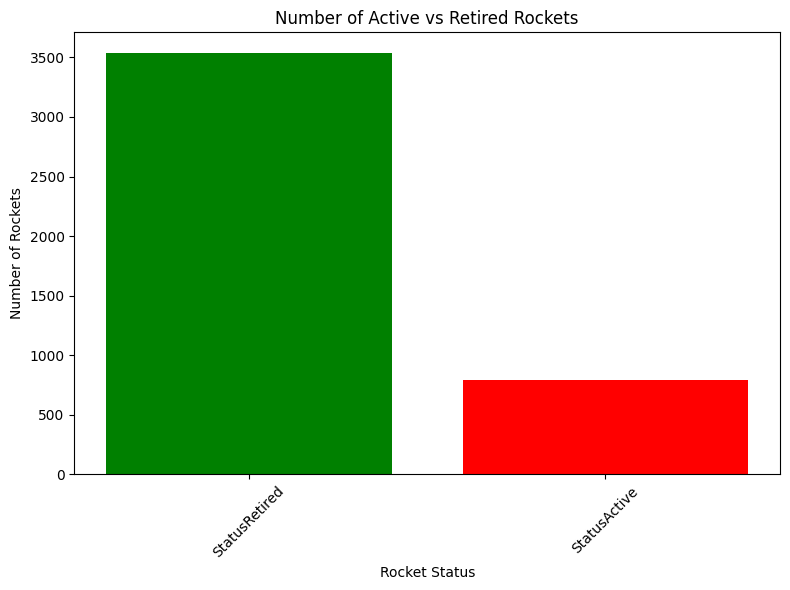

In [15]:
# Create a bar chart for rocket statuses
plt.figure(figsize=(8, 6))
plt.bar(rocket_status_counts.index, rocket_status_counts.values, color=['green', 'red'])
plt.xlabel('Rocket Status')
plt.ylabel('Number of Rockets')
plt.title('Number of Active vs Retired Rockets')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart shows the number of active versus retired rockets. There are significantly more retired rockets compared to active ones, highlighting the extensive history and evolution of space missions over time.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
# Calculate the distribution of mission statuses
mission_status_counts = df_cleaned['Mission_Status'].value_counts()
mission_status_counts

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

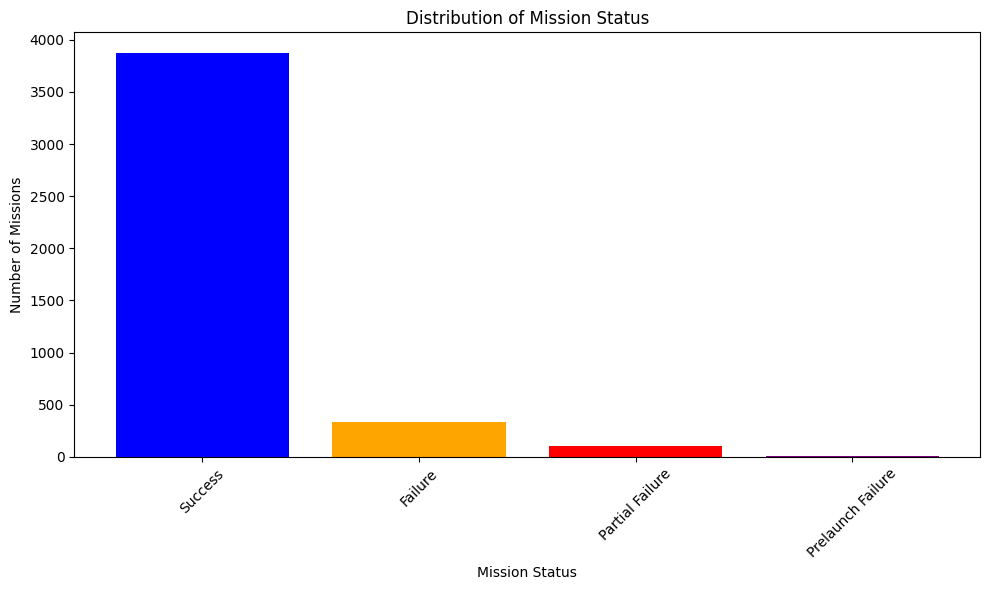

In [17]:
# Create a bar chart for mission statuses
plt.figure(figsize=(10, 6))
plt.bar(mission_status_counts.index, mission_status_counts.values, color=['blue', 'orange', 'red', 'purple'])
plt.xlabel('Mission Status')
plt.ylabel('Number of Missions')
plt.title('Distribution of Mission Status')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart illustrates the distribution of mission statuses, showing how many missions were successful, failed, partially failed, or had prelaunch failures. The majority of missions were successful, with a smaller proportion of failures and partial failures.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [18]:
# Convert the 'Price' column to numeric, replacing 'Unknown' with NaN
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
df_cleaned

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\2900793803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


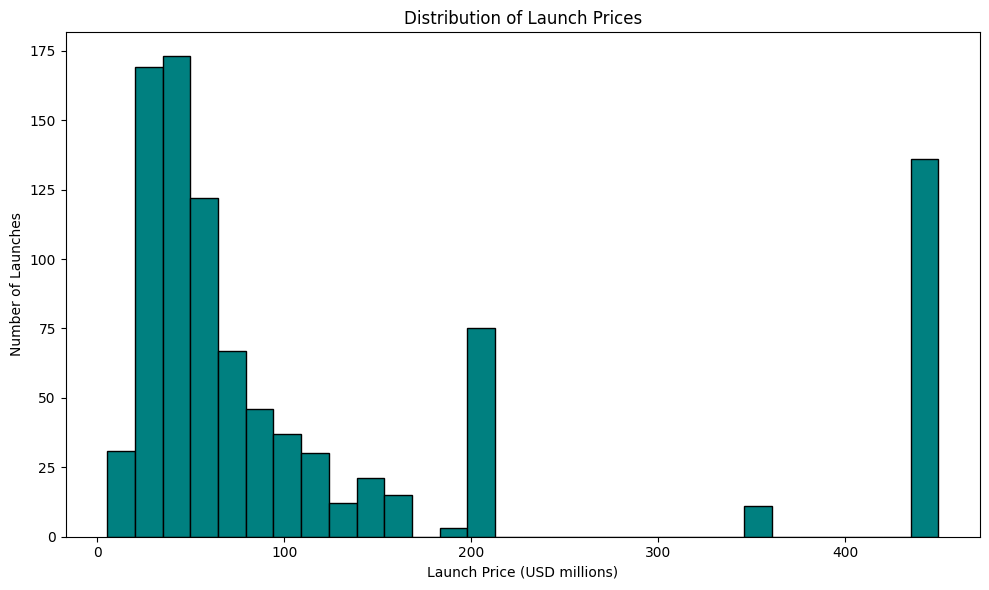

In [19]:
# Create a histogram to visualize the distribution of launch prices
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Price'].dropna(), bins=30, color='teal', edgecolor='black')
plt.xlabel('Launch Price (USD millions)')
plt.ylabel('Number of Launches')
plt.title('Distribution of Launch Prices')
plt.tight_layout()

# Display the plot
plt.show()

The histogram visualizes the distribution of launch prices in USD millions. It shows that most launches are concentrated in the lower price ranges, with fewer launches as the cost increases.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [28]:
# Map specific locations to country codes
wrangle_country_codes = {
    'USA': 'USA',
    'New Mexico': 'USA',
    'Gran Canaria': 'USA',
    'Pacific Missile Range Facility': 'USA',
    'Russia': 'RUS',
    'Barents Sea': 'RUS',
    'China': 'CHN',
    'Yellow Sea': 'CHN',
    'Iran': 'IRN',
    'Shahrud Missile Test Site': 'IRN'
}

# Function to map locations to countries
def get_country(location):
    for key in wrangle_country_codes:
        if key in location:
            return wrangle_country_codes[key]
    for country in countries:
        if country.name in location:
            return country.alpha3
    return 'Unknown'

In [29]:
# Apply the function to create a 'Country' column
df_cleaned['Country'] = df_cleaned['Location'].apply(get_country)
df_cleaned

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\3670109906.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [30]:
# Filter out unknown countries
df_known_countries = df_cleaned[df_cleaned['Country'] != 'Unknown']
df_known_countries

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [31]:
# Calculate the number of launches per country
launches_per_country = df_known_countries['Country'].value_counts().reset_index()
launches_per_country.columns = ['Country', 'Number of Launches']
launches_per_country

,Country,Number of Launches
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,299
4,CHN,268
5,JPN,126
6,IND,76
7,IRN,14
8,NZL,13
9,ISR,11


In [32]:
# Create a choropleth map
fig = px.choropleth(
    launches_per_country,
    locations='Country',
    locationmode='ISO-3',
    color='Number of Launches',
    color_continuous_scale='matter',
    title='Number of Space Mission Launches by Country',
    labels={'Number of Launches': 'Number of Launches'}
)

# Show the map
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
# Filter the dataset for failed missions
failed_missions = df_cleaned[df_cleaned['Mission_Status'] == 'Failure']

# Apply the function to create a 'Country' column for failed missions
failed_missions['Country'] = failed_missions['Location'].apply(lambda x: get_country(x))
failed_missions

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\505832086.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN
...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,KAZ
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA


In [34]:
# Filter out unknown countries
failed_known_countries = failed_missions[failed_missions['Country'] != 'Unknown']

# Calculate the number of failed launches per country
failures_per_country = failed_known_countries['Country'].value_counts().reset_index()
failures_per_country.columns = ['Country', 'Number of Failures']
failures_per_country

,Country,Number of Failures
0,USA,129
1,KAZ,72
2,RUS,63
3,CHN,19
4,FRA,13
5,JPN,10
6,IRN,8
7,IND,8
8,AUS,3
9,NZL,2


In [35]:
# Create a choropleth map for the number of failures by country
fig_failures = px.choropleth(
    failures_per_country,
    locations='Country',
    locationmode='ISO-3',
    color='Number of Failures',
    color_continuous_scale='matter',
    title='Number of Failed Space Mission Launches by Country',
    labels={'Number of Failures': 'Number of Failures'},
)

# Show the map
fig_failures.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [36]:
# Create a dataframe with the necessary hierarchical data
sunburst_data = df_cleaned[['Country', 'Organisation', 'Mission_Status']].copy()

# Replace 'Unknown' countries with NaN for better handling
sunburst_data.replace('Unknown', pd.NA, inplace=True)

# Drop rows with NaN values to clean the data for the sunburst chart
sunburst_data.dropna(inplace=True)
sunburst_data

,Country,Organisation,Mission_Status
0,USA,SpaceX,Success
1,CHN,CASC,Success
2,USA,SpaceX,Success
3,KAZ,Roscosmos,Success
4,USA,ULA,Success
...,...,...,...
4319,USA,US Navy,Failure
4320,USA,AMBA,Success
4321,USA,US Navy,Failure
4322,KAZ,RVSN USSR,Success


In [37]:
# Create the sunburst chart
fig_sunburst = px.sunburst(
    sunburst_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    color='Mission_Status',
    title='Sunburst Chart of Countries, Organisations, and Mission Status',
    color_discrete_map={
        'Success': 'green',
        'Failure': 'red',
        'Partial Failure': 'orange',
        'Prelaunch Failure': 'purple',
    },
)

# Show the sunburst chart
fig_sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [41]:
# Filter out rows with 'Unknown' in the 'Price' column
df_price_known = df_cleaned[df_cleaned['Price'] != 'Unknown']

# Drop na values
df_price_known = df_price_known.dropna(subset=['Price'])

# Convert the 'Price' column to numeric
df_price_known['Price'] = pd.to_numeric(df_price_known['Price'])
df_price_known

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


In [42]:
# Calculate the total amount of money spent by each organisation
total_spent_by_organisation = (
    df_price_known.groupby('Organisation')['Price'].sum().reset_index()
)
total_spent_by_organisation.columns = ['Organisation', 'Total Spent (USD millions)']

# Sort the data for better visualization
total_spent_by_organisation = total_spent_by_organisation.sort_values(
    by='Total Spent (USD millions)', ascending=False
)
total_spent_by_organisation

,Organisation,Total Spent (USD millions)
14,NASA,"61,200.00"
0,Arianespace,"16,345.00"
20,ULA,"14,798.00"
2,CASC,"6,310.51"
19,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
21,US Air Force,"1,550.92"
22,VKS RF,"1,548.90"


The top organizations by total spending are:

1. **NASA:** $61,200.00 million
2. **Arianespace:** $16,345.00 million
3. **ULA:** $14,798.00 million
4. **CASC:** $6,310.51 million
5. **SpaceX:** $5,444.00 million

This data provides insight into the financial investments made by various organizations in their space missions.

# Analyse the Amount of Money Spent by Organisation per Launch

In [43]:
# Calculate the number of launches per organisation
launches_per_organisation = df_price_known['Organisation'].value_counts().reset_index()
launches_per_organisation.columns = ['Organisation', 'Number of Launches']
launches_per_organisation

,Organisation,Number of Launches
0,CASC,157
1,NASA,136
2,SpaceX,99
3,ULA,98
4,Arianespace,96
5,Northrop,83
6,ISRO,67
7,MHI,37
8,VKS RF,33
9,US Air Force,26


In [44]:
# Merge the total spent data with the number of launches data
spending_per_launch = pd.merge(
    total_spent_by_organisation, launches_per_organisation, on='Organisation'
)

# Calculate the amount of money spent per launch
spending_per_launch['Spent per Launch (USD millions)'] = (
    spending_per_launch['Total Spent (USD millions)']
    / spending_per_launch['Number of Launches']
)

# Sort the data for better visualization
spending_per_launch = spending_per_launch.sort_values(
    by='Spent per Launch (USD millions)', ascending=False
)
spending_per_launch

,Organisation,Total Spent (USD millions),Number of Launches,Spent per Launch (USD millions)
0,NASA,"61,200.00",136,450.00
11,Boeing,"1,241.00",7,177.29
1,Arianespace,"16,345.00",96,170.26
2,ULA,"14,798.00",98,151.00
10,ILS,"1,320.00",13,101.54
6,MHI,"3,532.50",37,95.47
13,Martin Marietta,721.40,9,80.16
8,US Air Force,"1,550.92",26,59.65
17,JAXA,168.00,3,56.00
4,SpaceX,"5,444.00",99,54.99


The top organizations by spending per launch:

1. **NASA:** $450.00 million per launch
2. **Boeing:** $177.29 million per launch
3. **Arianespace:** $170.26 million per launch
4. **ULA:** $151.00 million per launch
5. **ILS:** $101.54 million per launch

This data highlights the average cost per launch for these organizations, providing insight into their financial efficiency in conducting space missions.

# Chart the Number of Launches per Year

In [45]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce', utc=True)

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Calculate the number of launches per year
launches_per_year = df_cleaned['Year'].value_counts().sort_index().reset_index()
launches_per_year.columns = ['Year', 'Number of Launches']
launches_per_year

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\1665968335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\1665968335.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Number of Launches
0,"1,957.00",3
1,"1,958.00",22
2,"1,959.00",20
3,"1,960.00",38
4,"1,961.00",52
...,...,...
59,"2,016.00",88
60,"2,017.00",90
61,"2,018.00",117
62,"2,019.00",107


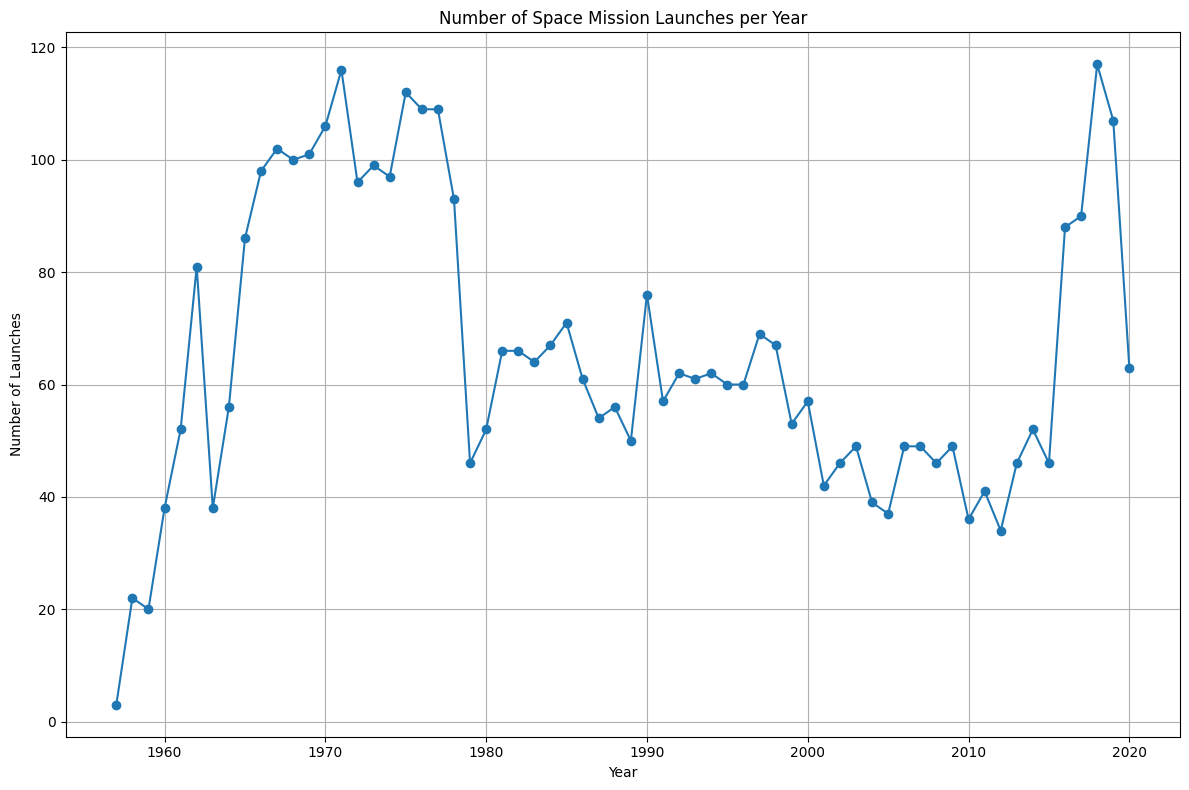

In [46]:
# Create a line chart for the number of launches per year
plt.figure(figsize=(12, 8))
plt.plot(launches_per_year['Year'], launches_per_year['Number of Launches'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches per Year')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

This line chart displays the number of space mission launches per year. It shows the trends in space mission launches over time, indicating periods of increased or decreased activity.

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [49]:
# Extract the year and month from the 'Date' column
df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M')

# Calculate the number of launches per month
launches_per_month = df_cleaned['YearMonth'].value_counts().sort_index().reset_index()
launches_per_month.columns = ['YearMonth', 'Number of Launches']

# Convert 'YearMonth' to datetime for plotting
launches_per_month['YearMonth'] = launches_per_month['YearMonth'].dt.to_timestamp()

# Calculate the rolling average (12-month window)
launches_per_month['Rolling Average'] = (
    launches_per_month['Number of Launches'].rolling(window=12).mean()
)
launches_per_month

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\3789689026.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\3789689026.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YearMonth,Number of Launches,Rolling Average
0,1957-10-01,1,NaN
1,1957-11-01,1,NaN
2,1957-12-01,1,NaN
3,1958-02-01,2,NaN
4,1958-03-01,3,NaN
...,...,...,...
742,2020-04-01,5,9.08
743,2020-05-01,9,9.08
744,2020-06-01,7,9.08
745,2020-07-01,14,9.33


In [50]:
# Find the month with the highest number of launches
max_launches_month = launches_per_month.loc[launches_per_month['Number of Launches'].idxmax()]
max_launches_month

YearMonth             1968-04-01 00:00:00
Number of Launches                     16
Rolling Average                      8.67
Name: 120, dtype: object

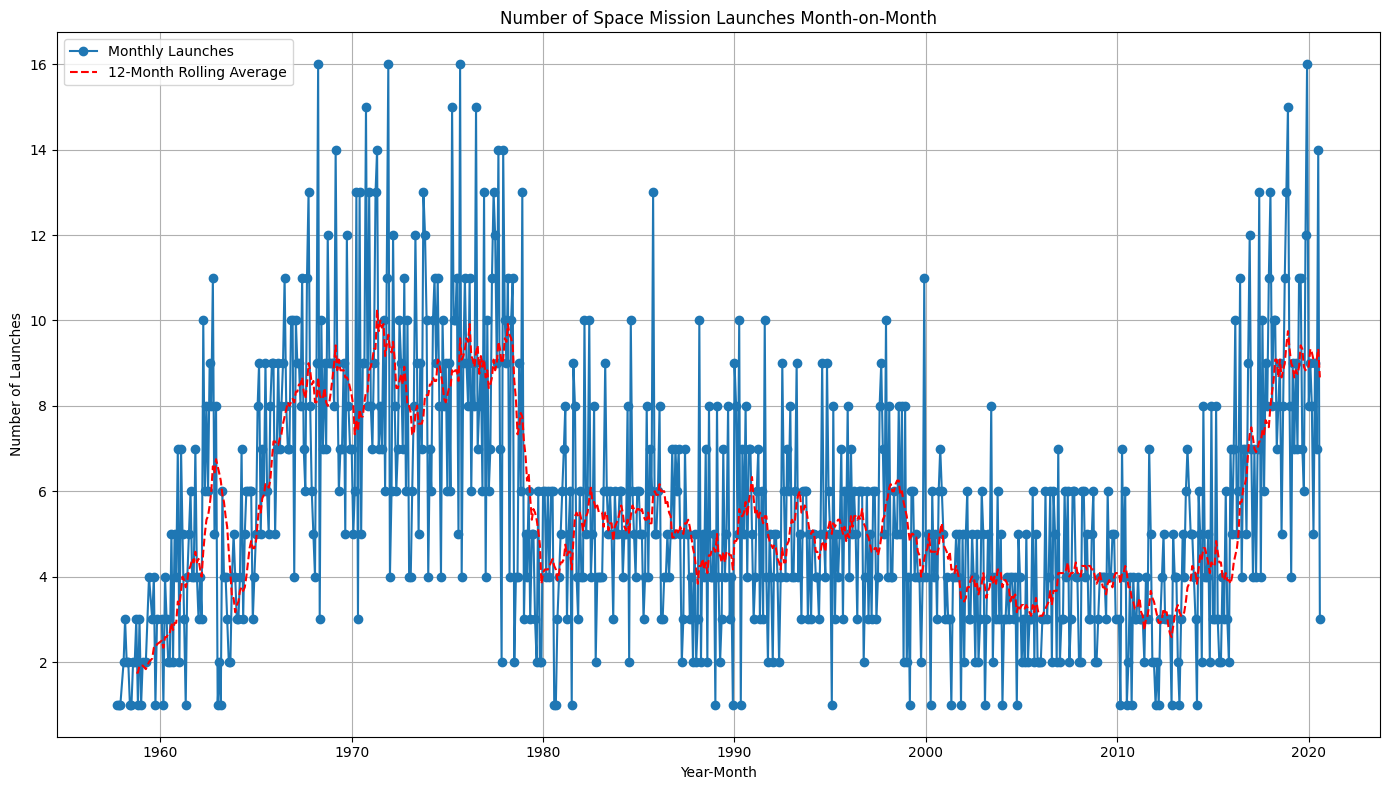

In [51]:
# Create the time series plot with a rolling average
plt.figure(figsize=(14, 8))
plt.plot(
    launches_per_month['YearMonth'],
    launches_per_month['Number of Launches'],
    label='Monthly Launches',
    marker='o',
)
plt.plot(
    launches_per_month['YearMonth'],
    launches_per_month['Rolling Average'],
    label='12-Month Rolling Average',
    linestyle='--',
    color='red',
)
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches Month-on-Month')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The chart displays the number of space mission launches month-on-month along with a 12-month rolling average. The month with the highest number of launches is **April 1968**, which saw 16 launches.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [52]:
# Extract the month from the 'Date' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Calculate the number of launches per month
launches_per_month = df_cleaned['Month'].value_counts().sort_index().reset_index()
launches_per_month.columns = ['Month', 'Number of Launches']
launches_per_month

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\2251192403.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Number of Launches
0,1.00,265
1,2.00,323
2,3.00,349
3,4.00,366
4,5.00,320
5,6.00,386
6,7.00,347
7,8.00,358
8,9.00,354
9,10.00,375


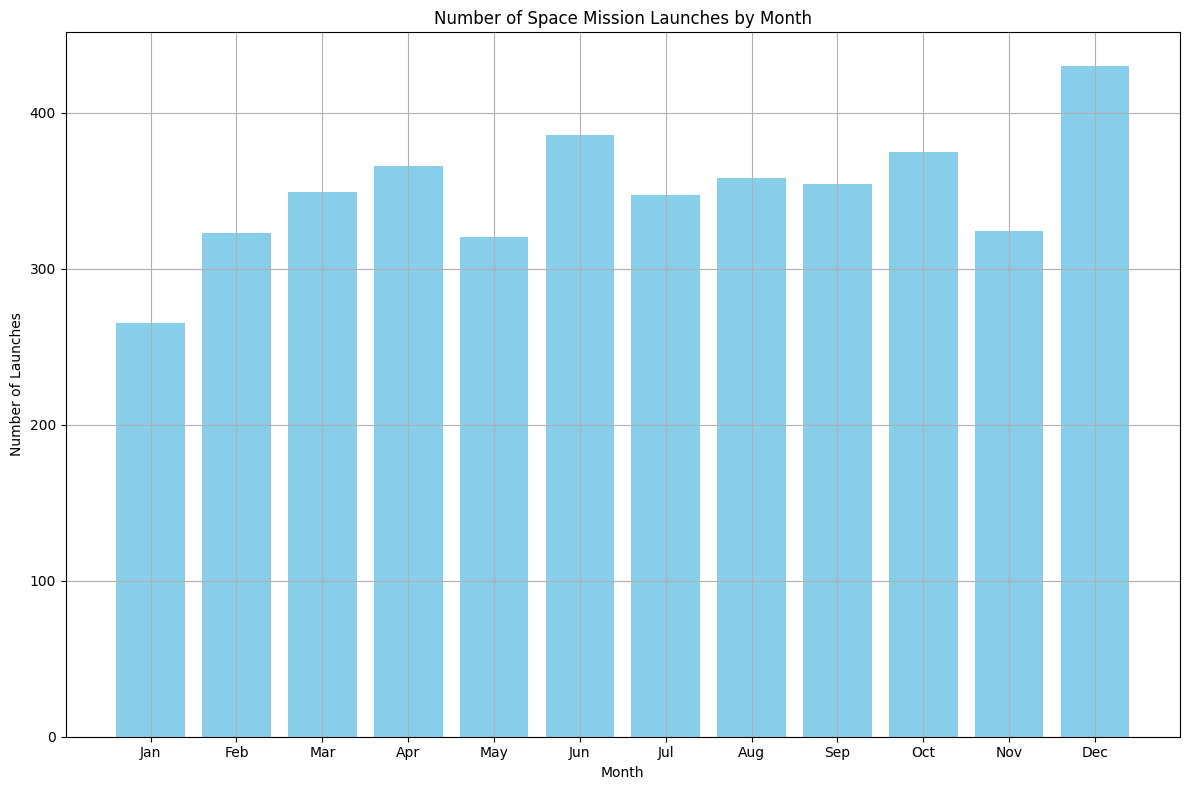

In [53]:
# Create a bar chart for the number of launches per month
plt.figure(figsize=(12, 8))
plt.bar(
    launches_per_month['Month'],
    launches_per_month['Number of Launches'],
    color='skyblue',
)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches by Month')
plt.xticks(
    launches_per_month['Month'],
    [
        'Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'Jun',
        'Jul',
        'Aug',
        'Sep',
        'Oct',
        'Nov',
        'Dec',
    ],
)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
# Identify the most and least popular months for launches
most_popular_month = launches_per_month.loc[
    launches_per_month['Number of Launches'].idxmax()
]
least_popular_month = launches_per_month.loc[
    launches_per_month['Number of Launches'].idxmin()
]

most_popular_month, least_popular_month

(Month                 12.00
 Number of Launches   430.00
 Name: 11, dtype: float64,
 Month                  1.00
 Number of Launches   265.00
 Name: 0, dtype: float64)

The analysis of launches by month reveals the following:

- **Most Popular Month for Launches:** December, with 430 launches.
- **Least Popular Month for Launches:** January, with 265 launches.

This pattern suggests that December tends to be the most favorable month for space missions, potentially due to better weather conditions or other operational factors. Conversely, January is the least favorable month.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [55]:
# Filter out rows with 'Unknown' in the 'Price' column
df_price_known = df_cleaned[df_cleaned['Price'] != 'Unknown']

# Drop NA values
df_price_known = df_price_known.dropna(subset=['Price'])

# Calculate the average launch price per year
average_price_per_year = df_price_known.groupby(df_price_known['Date'].dt.year)['Price'].mean().reset_index()
average_price_per_year.columns = ['Year', 'Average Price (USD millions)']
average_price_per_year

,Year,Average Price (USD millions)
0,"1,964.00",63.23
1,"1,965.00",63.23
2,"1,966.00",59.00
3,"1,967.00",59.00
4,"1,968.00",59.00
5,"1,969.00",59.00
6,"1,981.00",450.00
7,"1,982.00",345.20
8,"1,983.00",366.16
9,"1,984.00",380.13


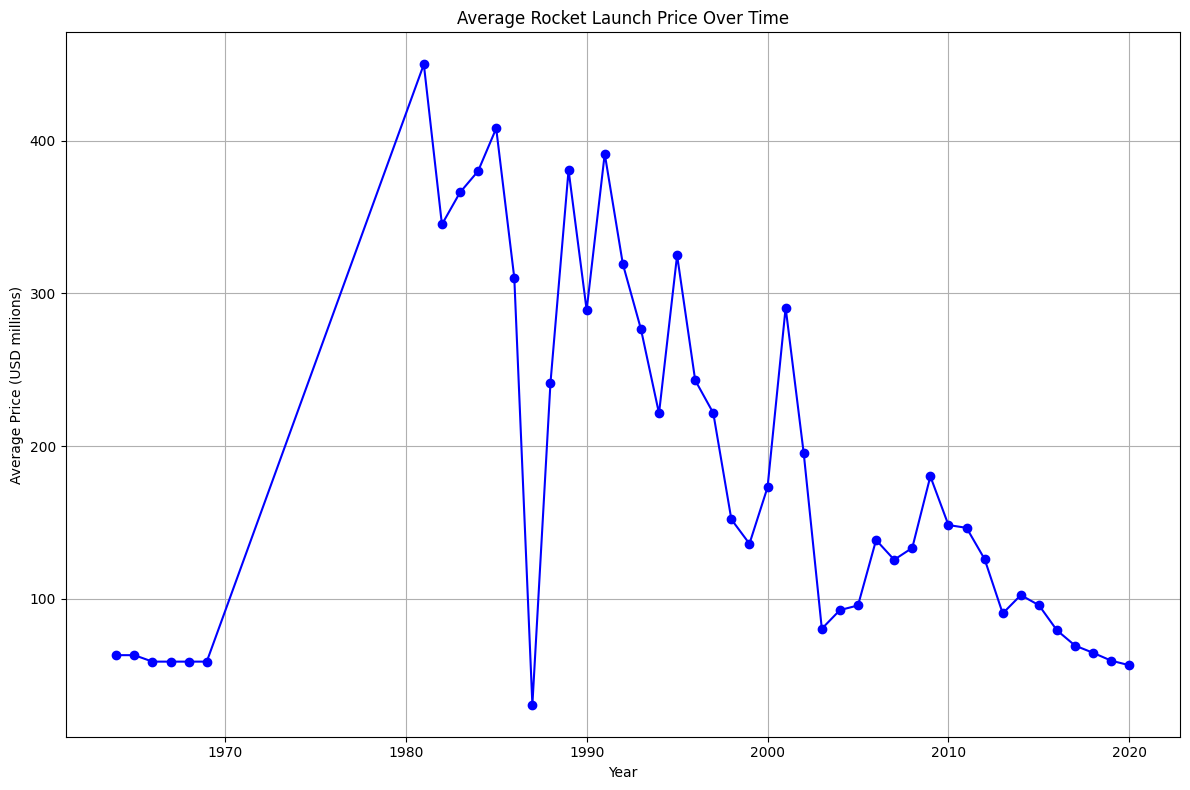

In [56]:
# Create a line chart to show the average launch price over time
plt.figure(figsize=(12, 8))
plt.plot(average_price_per_year['Year'], average_price_per_year['Average Price (USD millions)'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Average Price (USD millions)')
plt.title('Average Rocket Launch Price Over Time')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The line chart illustrates how the average price of rocket launches has varied over time. The trend provides insights into the cost fluctuations and possible reasons behind these changes, such as technological advancements, changes in the aerospace industry, or economic factors.

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [57]:
# Identify the top 10 organisations by the number of launches
top_10_organisations = df_cleaned['Organisation'].value_counts().head(10).index
top_10_organisations

Index(['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')

In [59]:
# Filter the dataset for only the top 10 organisations
df_top_10 = df_cleaned[df_cleaned['Organisation'].isin(top_10_organisations)]
df_top_10

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,YearMonth,Month
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,"2,020.00",2020-08,8.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,"2,020.00",2020-07,7.00
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,"2,020.00",2020-07,7.00
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,CHN,"2,020.00",2020-07,7.00
12,CASC,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00+00:00,Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,CHN,"2,020.00",2020-07,7.00
...,...,...,...,...,...,...,...,...,...,...,...
4307,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-08-17 12:18:00+00:00,Thor-DM 18 Able I | Pioneer 0,StatusRetired,NaN,Failure,USA,"1,958.00",1958-08,8.00
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,KAZ,"1,958.00",1958-05,5.00
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,KAZ,"1,958.00",1958-04,4.00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,"1,957.00",1957-11,11.00


In [60]:
# Calculate the number of launches per year for the top 10 organisations
launches_per_year_org = (
    df_top_10.groupby(['Date', 'Organisation'])
    .size()
    .reset_index(name='Number of Launches')
)

# Convert 'Date' to year for better aggregation
launches_per_year_org['Year'] = launches_per_year_org['Date'].dt.year

# Aggregate the number of launches per year for each organisation
launches_per_year_org = (
    launches_per_year_org.groupby(['Year', 'Organisation'])['Number of Launches']
    .sum()
    .reset_index()
)
launches_per_year_org

,Year,Organisation,Number of Launches
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
317,2019,VKS RF,8
318,2020,Arianespace,4
319,2020,CASC,19
320,2020,ULA,4


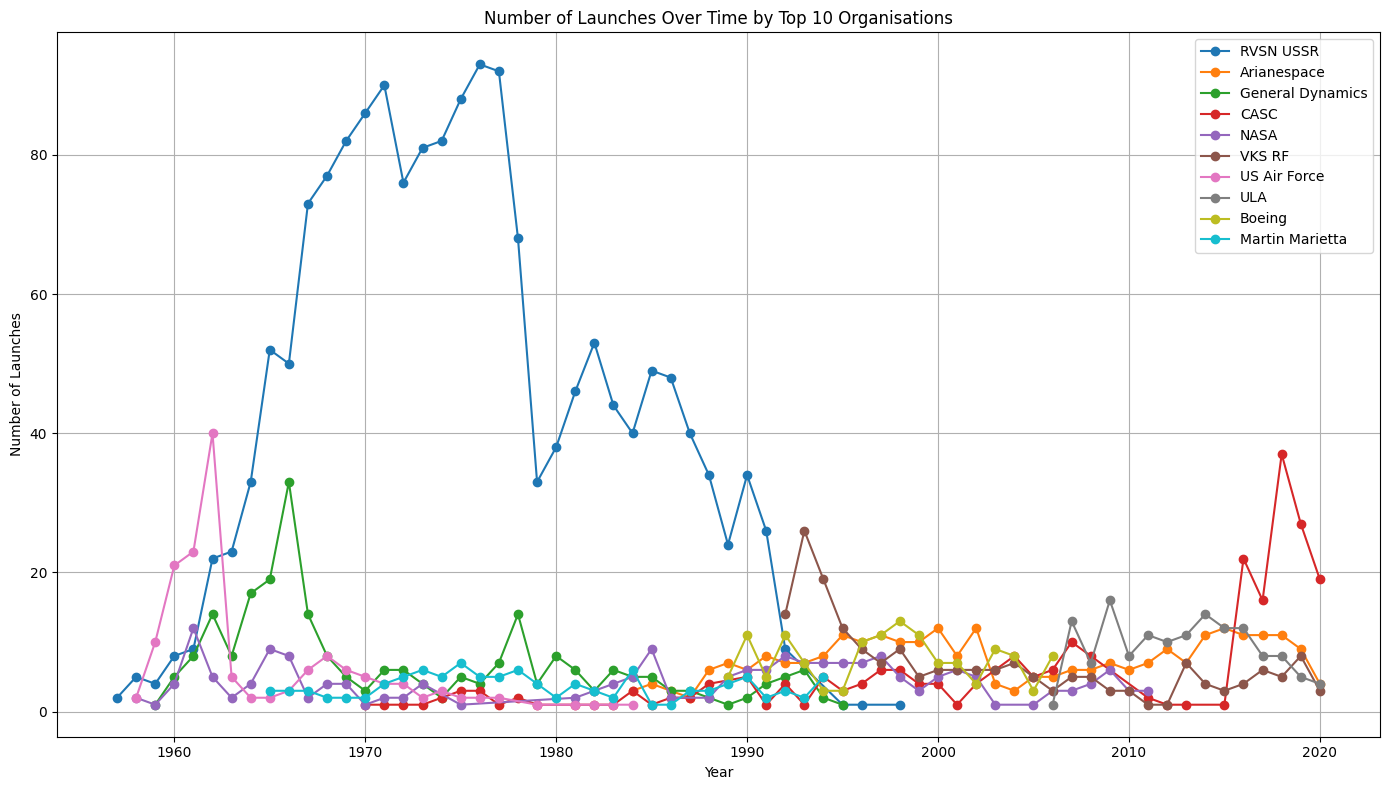

In [61]:
# Create a line chart for the number of launches over time by the top 10 organisations
plt.figure(figsize=(14, 8))
for organisation in top_10_organisations:
    org_data = launches_per_year_org[
        launches_per_year_org['Organisation'] == organisation
    ]
    plt.plot(
        org_data['Year'], org_data['Number of Launches'], marker='o', label=organisation
    )

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The chart displays the number of launches over time by the top 10 organizations. It shows how the dominance of different players in the space industry has changed over the years. 

This visualization provides insight into the trends and shifts in leadership among these key organizations.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [62]:
# Filter the dataset for the Cold War period (up to 1991)
cold_war_period = df_cleaned[df_cleaned['Date'] <= '1991-12-31']

# Filter for USA and USSR/Russian Federation launches
cold_war_usa_ussr = cold_war_period[(cold_war_period['Country'].isin(['USA', 'RUS']))]

# Replace 'Russian Federation' with 'USSR' for historical accuracy
cold_war_usa_ussr['Country'] = cold_war_usa_ussr['Country'].replace({'RUS': 'USSR'})
cold_war_usa_ussr

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\212889394.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,YearMonth,Month
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,"1,991.00",1991-12,12.00
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,"1,991.00",1991-12,12.00
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,"1,991.00",1991-11,11.00
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,"1,991.00",1991-11,11.00
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA,"1,991.00",1991-11,11.00
...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,"1,958.00",1958-03,3.00
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,"1,958.00",1958-03,3.00
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,"1,958.00",1958-02,2.00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,"1,958.00",1958-02,2.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [63]:
# Include former Soviet Republics in the USSR total
soviet_republics = ['RUS', 'KAZ']
cold_war_usa_ussr['Country'] = cold_war_usa_ussr['Country'].replace(soviet_republics, 'USSR')
cold_war_usa_ussr

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\1752953673.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,YearMonth,Month
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,"1,991.00",1991-12,12.00
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,"1,991.00",1991-12,12.00
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,"1,991.00",1991-11,11.00
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,"1,991.00",1991-11,11.00
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA,"1,991.00",1991-11,11.00
...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,"1,958.00",1958-03,3.00
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,"1,958.00",1958-03,3.00
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,"1,958.00",1958-02,2.00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,"1,958.00",1958-02,2.00


In [64]:
# Calculate the total number of launches for the USA and USSR
total_launches_usa_ussr = cold_war_usa_ussr['Country'].value_counts().reset_index()
total_launches_usa_ussr.columns = ['Country', 'Number of Launches']
total_launches_usa_ussr

,Country,Number of Launches
0,USSR,1146
1,USA,644


In [65]:
# Create a Plotly pie chart
fig_pie = px.pie(
    total_launches_usa_ussr,
    values='Number of Launches',
    names='Country',
    title='Total Number of Launches: USA vs USSR (Cold War Period)',
    color_discrete_sequence=px.colors.sequential.matter,
)

# Show the pie chart
fig_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [66]:
# Calculate the number of launches per year for USA and USSR
launches_per_year_usa_ussr = cold_war_usa_ussr.groupby(['Date', 'Country']).size().reset_index(name='Number of Launches')
launches_per_year_usa_ussr['Year'] = launches_per_year_usa_ussr['Date'].dt.year

# Aggregate the number of launches per year for each country
launches_per_year_usa_ussr = launches_per_year_usa_ussr.groupby(['Year', 'Country'])['Number of Launches'].sum().reset_index()
launches_per_year_usa_ussr

,Year,Country,Number of Launches
0,1957,USA,1
1,1958,USA,17
2,1959,USA,16
3,1960,USA,30
4,1961,USA,43
...,...,...,...
61,1989,USSR,20
62,1990,USA,26
63,1990,USSR,28
64,1991,USA,18


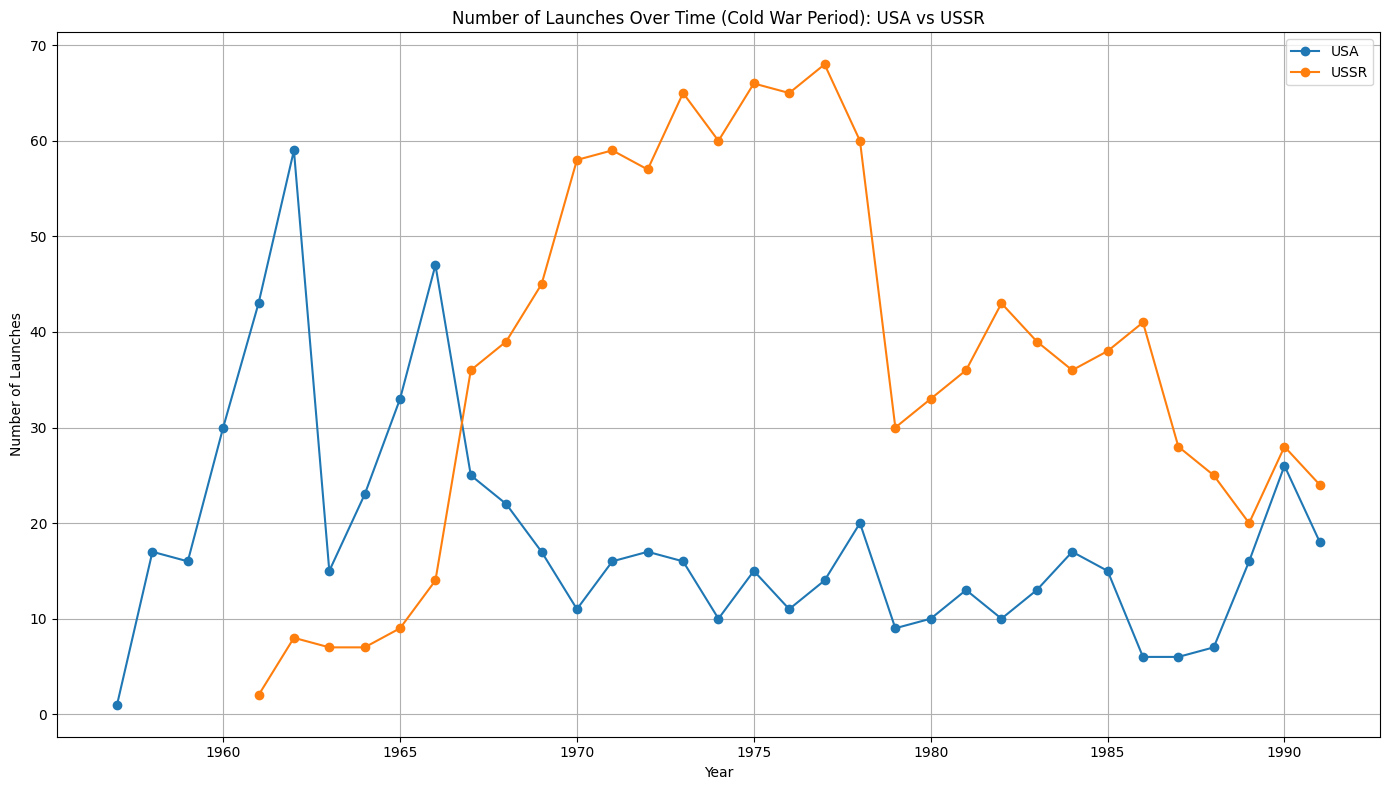

In [67]:
# Create a line chart for the number of launches over time for USA and USSR during the Cold War
plt.figure(figsize=(14, 8))
for country in ['USA', 'USSR']:
    country_data = launches_per_year_usa_ussr[launches_per_year_usa_ussr['Country'] == country]
    plt.plot(country_data['Year'], country_data['Number of Launches'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time (Cold War Period): USA vs USSR')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The chart illustrates the number of launches year-on-year for the USA and USSR during the Cold War period. It provides a visual representation of the competition in space exploration between these two superpowers.

## Chart the Total Number of Mission Failures Year on Year.

In [68]:
# Filter the dataset for failed missions
failed_missions = df_cleaned[df_cleaned['Mission_Status'] == 'Failure']

# Calculate the number of failed launches per year
failures_per_year = failed_missions.groupby(failed_missions['Date'].dt.year).size().reset_index(name='Number of Failures')
failures_per_year.columns = ['Year', 'Number of Failures']
failures_per_year

,Year,Number of Failures
0,"1,957.00",1
1,"1,958.00",14
2,"1,959.00",9
3,"1,960.00",19
4,"1,961.00",17
...,...,...
58,"2,016.00",2
59,"2,017.00",5
60,"2,018.00",2
61,"2,019.00",5


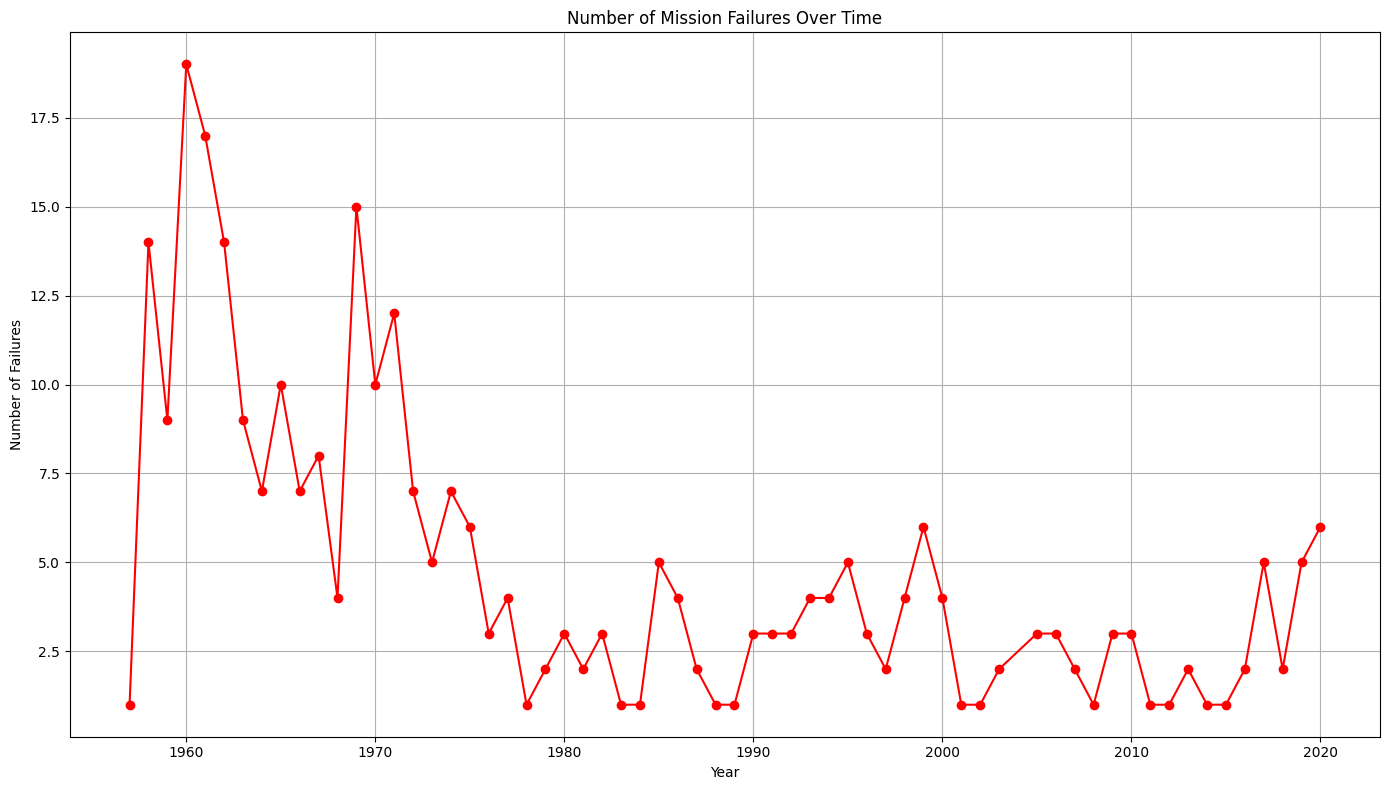

In [69]:
# Create a line chart for the number of mission failures over time
plt.figure(figsize=(14, 8))
plt.plot(failures_per_year['Year'], failures_per_year['Number of Failures'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.title('Number of Mission Failures Over Time')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimizing risk and improving their chances of success over time? 

In [70]:
# Calculate the total number of launches per year
total_launches_per_year = df_cleaned.groupby(df_cleaned['Date'].dt.year).size().reset_index(name='Total Launches')
total_launches_per_year.columns = ['Year', 'Total Launches']

# Calculate the number of failed launches per year
failures_per_year = failed_missions.groupby(failed_missions['Date'].dt.year).size().reset_index(name='Number of Failures')
failures_per_year.columns = ['Year', 'Number of Failures']

# Merge the total launches and failures data
failures_percentage = pd.merge(total_launches_per_year, failures_per_year, on='Year', how='left')
failures_percentage['Number of Failures'].fillna(0, inplace=True)
failures_percentage['Failure Percentage'] = (failures_percentage['Number of Failures'] / failures_percentage['Total Launches']) * 100
failures_percentage

C:\Users\brian\AppData\Local\Temp\ipykernel_24308\3323892709.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Year,Total Launches,Number of Failures,Failure Percentage
0,"1,957.00",3,1.00,33.33
1,"1,958.00",22,14.00,63.64
2,"1,959.00",20,9.00,45.00
3,"1,960.00",38,19.00,50.00
4,"1,961.00",52,17.00,32.69
...,...,...,...,...
59,"2,016.00",88,2.00,2.27
60,"2,017.00",90,5.00,5.56
61,"2,018.00",117,2.00,1.71
62,"2,019.00",107,5.00,4.67


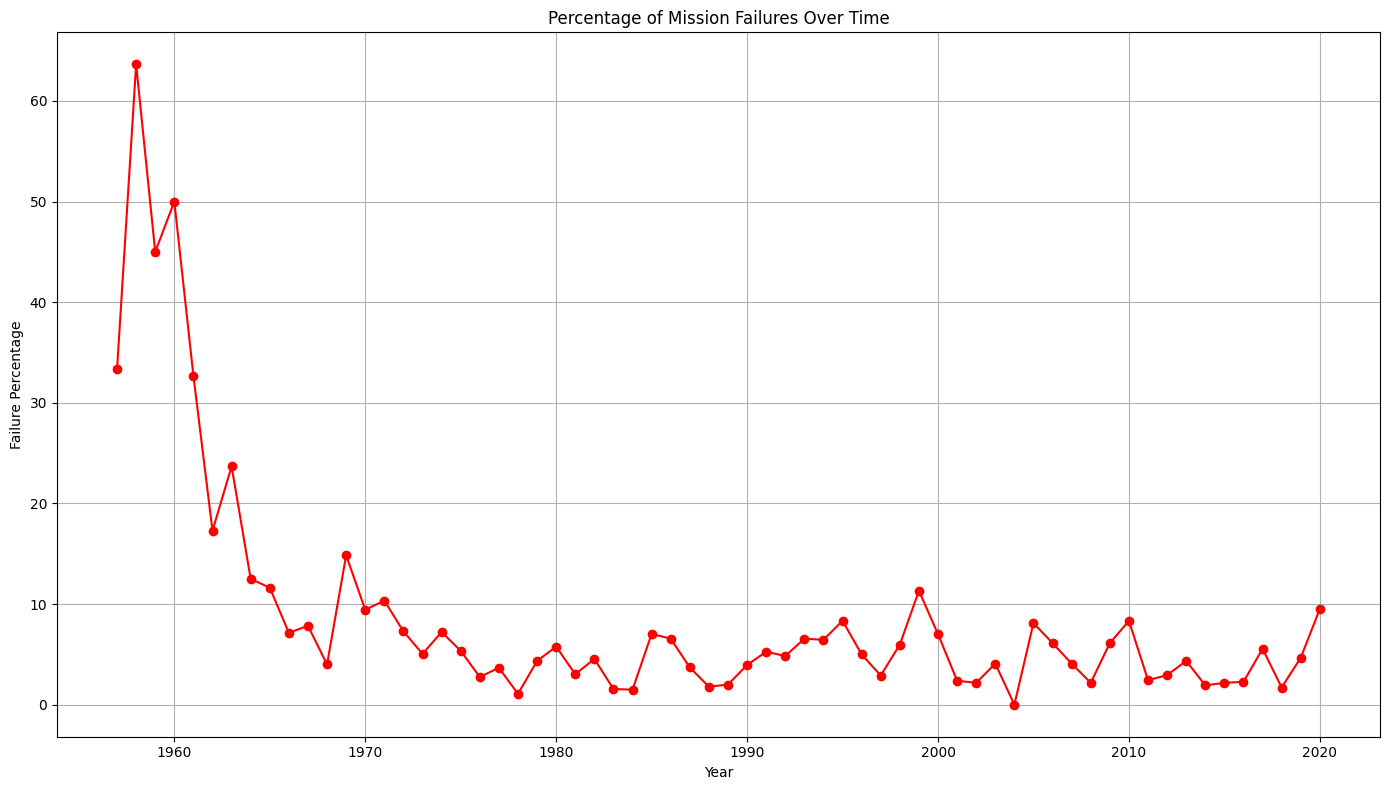

In [71]:
# Create a line chart for the percentage of failures over time
plt.figure(figsize=(14, 8))
plt.plot(failures_percentage['Year'], failures_percentage['Failure Percentage'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.title('Percentage of Mission Failures Over Time')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

The chart illustrates the percentage of mission failures over time. This visualization shows whether the rate of failures increased or decreased over the years, providing insight into how countries improved their chances of success and minimized risks over time.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [72]:
# Calculate the total number of launches per year for each country
total_launches_per_year_country = (
    df_cleaned.groupby(['Date', 'Country']).size().reset_index(name='Total Launches')
)
total_launches_per_year_country['Year'] = total_launches_per_year_country[
    'Date'
].dt.year

# Aggregate the number of launches per year for each country
total_launches_per_year_country = (
    total_launches_per_year_country.groupby(['Year', 'Country'])['Total Launches']
    .sum()
    .reset_index()
)

# Determine the leading country each year by total number of launches
leading_country_per_year = total_launches_per_year_country.loc[
    total_launches_per_year_country.groupby('Year')['Total Launches'].idxmax()
].reset_index(drop=True)
leading_country_per_year

,Year,Country,Total Launches
0,1957,KAZ,2
1,1958,USA,17
2,1959,USA,16
3,1960,USA,30
4,1961,USA,43
...,...,...,...
59,2016,USA,25
60,2017,USA,29
61,2018,CHN,39
62,2019,CHN,34


In [75]:
# Filter for successful missions
successful_missions = df_cleaned[df_cleaned['Mission_Status'] == 'Success']

# Calculate the total number of successful launches per year for each country
successful_launches_per_year_country = (
    successful_missions.groupby(['Date', 'Country'])
    .size()
    .reset_index(name='Total Successful Launches')
)
successful_launches_per_year_country['Year'] = successful_launches_per_year_country[
    'Date'
].dt.year

# Aggregate the number of successful launches per year for each country
successful_launches_per_year_country = (
    successful_launches_per_year_country.groupby(['Year', 'Country'])[
        'Total Successful Launches'
    ]
    .sum()
    .reset_index()
)
# Determine the leading country each year by total number of successful launches
leading_successful_country_per_year = successful_launches_per_year_country.loc[successful_launches_per_year_country.groupby('Year')['Total Successful Launches'].idxmax()].reset_index(drop=True)
leading_successful_country_per_year

,Year,Country,Total Successful Launches
0,1957,KAZ,2
1,1958,USA,5
2,1959,USA,6
3,1960,USA,16
4,1961,USA,27
...,...,...,...
59,2016,USA,24
60,2017,USA,29
61,2018,CHN,38
62,2019,CHN,32


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [76]:
# Calculate the total number of launches per year for each organisation
total_launches_per_year_org = df_cleaned.groupby(['Date', 'Organisation']).size().reset_index(name='Total Launches')
total_launches_per_year_org['Year'] = total_launches_per_year_org['Date'].dt.year

# Aggregate the number of launches per year for each organisation
total_launches_per_year_org = total_launches_per_year_org.groupby(['Year', 'Organisation'])['Total Launches'].sum().reset_index()
total_launches_per_year_org

,Year,Organisation,Total Launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
627,2020,Roscosmos,4
628,2020,SpaceX,14
629,2020,ULA,4
630,2020,VKS RF,3


In [77]:
# Determine the leading organisation each year by total number of launches
leading_org_per_year = total_launches_per_year_org.loc[total_launches_per_year_org.groupby('Year')['Total Launches'].idxmax()].reset_index(drop=True)
leading_org_per_year

,Year,Organisation,Total Launches
0,1957,RVSN USSR,2
1,1958,AMBA,7
2,1959,US Air Force,10
3,1960,US Air Force,21
4,1961,US Air Force,23
...,...,...,...
59,2016,CASC,22
60,2017,SpaceX,18
61,2018,CASC,37
62,2019,CASC,27


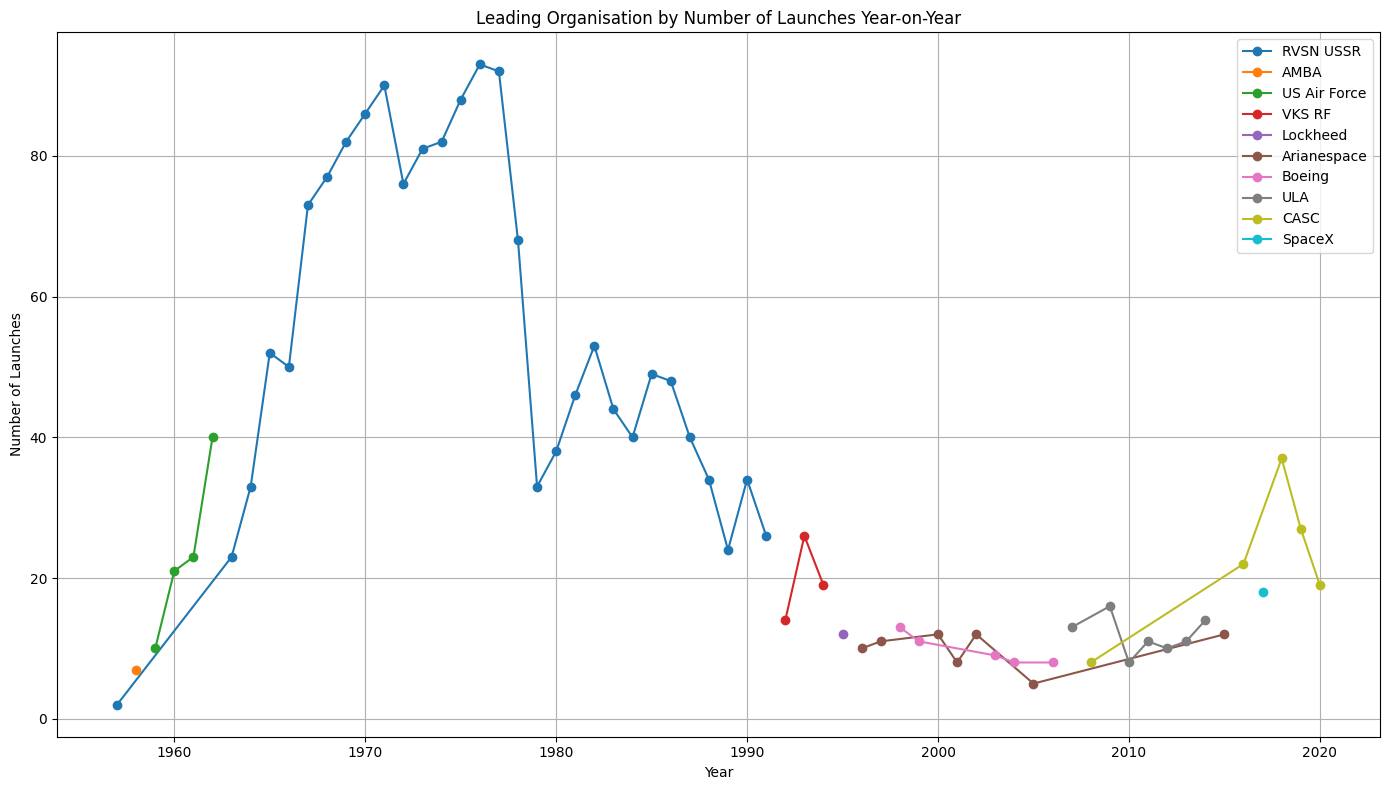

In [78]:
# Create a line chart for the number of launches over time for the leading organisations
plt.figure(figsize=(14, 8))
for organisation in leading_org_per_year['Organisation'].unique():
    org_data = leading_org_per_year[leading_org_per_year['Organisation'] == organisation]
    plt.plot(org_data['Year'], org_data['Total Launches'], marker='o', label=organisation)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Leading Organisation by Number of Launches Year-on-Year')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [79]:
# Identify the dominant organisation in the 1970s, 1980s, and 2018-2020
dominant_1970s = leading_org_per_year[(leading_org_per_year['Year'] >= 1970) & (leading_org_per_year['Year'] < 1980)]
dominant_1980s = leading_org_per_year[(leading_org_per_year['Year'] >= 1980) & (leading_org_per_year['Year'] < 1990)]
dominant_recent = leading_org_per_year[leading_org_per_year['Year'].isin([2018, 2019, 2020])]

dominant_1970s, dominant_1980s, dominant_recent

(    Year Organisation  Total Launches
 13  1970    RVSN USSR              86
 14  1971    RVSN USSR              90
 15  1972    RVSN USSR              76
 16  1973    RVSN USSR              81
 17  1974    RVSN USSR              82
 18  1975    RVSN USSR              88
 19  1976    RVSN USSR              93
 20  1977    RVSN USSR              92
 21  1978    RVSN USSR              68
 22  1979    RVSN USSR              33,
     Year Organisation  Total Launches
 23  1980    RVSN USSR              38
 24  1981    RVSN USSR              46
 25  1982    RVSN USSR              53
 26  1983    RVSN USSR              44
 27  1984    RVSN USSR              40
 28  1985    RVSN USSR              49
 29  1986    RVSN USSR              48
 30  1987    RVSN USSR              40
 31  1988    RVSN USSR              34
 32  1989    RVSN USSR              24,
     Year Organisation  Total Launches
 61  2018         CASC              37
 62  2019         CASC              27
 63  2020         CASC 

Dominant organizations in terms of the number of launches year-on-year:

### Dominant Organization in the 1970s:
- **RVSN USSR** was the dominant organization throughout the 1970s, consistently leading in the number of launches each year.

### Dominant Organization in the 1980s:
- **RVSN USSR** continued to be the dominant organization in the 1980s, maintaining the lead in the number of launches each year.

### Dominant Organization in 2018, 2019, and 2020:
- **CASC** (China Aerospace Science and Technology Corporation) was the dominant organization in 2018, 2019, and 2020.

The previous chart and data highlight the shifts in dominance over different decades, reflecting changes in geopolitical and technological leadership in space exploration.